In [ ]:
import pandas as pd
import numpy as np
import torch.nn as nn
import torch
from sklearn.model_selection import train_test_split

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/yesmubin/dataset/main/houseprice.csv")

In [ ]:
df

,Id,MSSubClass,LotArea,BldgType,OverallCond,TotalBsmtSF,SalePrice
0,0,60,8450,1Fam,5,856,208500
1,1,20,9600,1Fam,8,1262,181500
2,2,60,11250,1Fam,5,920,223500
3,3,70,9550,1Fam,5,756,140000
4,4,60,14260,1Fam,5,1145,250000
...,...,...,...,...,...,...,...
1455,1455,60,7917,1Fam,5,953,175000
1456,1456,20,13175,1Fam,6,1542,210000
1457,1457,70,9042,1Fam,9,1152,266500
1458,1458,20,9717,1Fam,6,1078,142125


In [ ]:
df.describe()

,Id,MSSubClass,LotArea,OverallCond,TotalBsmtSF,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,729.500000,56.897260,10516.828082,5.575342,1057.429452,180921.195890
std,421.610009,42.300571,9981.264932,1.112799,438.705324,79442.502883
min,0.000000,20.000000,1300.000000,1.000000,0.000000,34900.000000
25%,364.750000,20.000000,7553.500000,5.000000,795.750000,129975.000000
50%,729.500000,50.000000,9478.500000,5.000000,991.500000,163000.000000
75%,1094.250000,70.000000,11601.500000,6.000000,1298.250000,214000.000000
max,1459.000000,190.000000,215245.000000,9.000000,6110.000000,755000.000000


In [ ]:
df.shape

(1460, 7)

In [ ]:
df.isnull().sum()

,0
Id,0
MSSubClass,0
LotArea,0
BldgType,0
OverallCond,0
TotalBsmtSF,0
SalePrice,0


In [ ]:
df.dtypes

,0
Id,int64
MSSubClass,int64
LotArea,int64
BldgType,object
OverallCond,int64
TotalBsmtSF,int64
SalePrice,int64


In [ ]:
df["BldgType"].unique()

array(['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'], dtype=object)

In [ ]:
df["BldgType"].value_counts()

,count
BldgType,
1Fam,1220
TwnhsE,114
Duplex,52
Twnhs,43
2fmCon,31


In [ ]:
from sklearn.preprocessing import LabelEncoder
transform=LabelEncoder()
df["BldgType"]=transform.fit_transform(df["BldgType"])

In [ ]:
df

,Id,MSSubClass,LotArea,BldgType,OverallCond,TotalBsmtSF,SalePrice
0,0,60,8450,0,5,856,208500
1,1,20,9600,0,8,1262,181500
2,2,60,11250,0,5,920,223500
3,3,70,9550,0,5,756,140000
4,4,60,14260,0,5,1145,250000
...,...,...,...,...,...,...,...
1455,1455,60,7917,0,5,953,175000
1456,1456,20,13175,0,6,1542,210000
1457,1457,70,9042,0,9,1152,266500
1458,1458,20,9717,0,6,1078,142125


In [ ]:
df.isnull().any()

,0
Id,False
MSSubClass,False
LotArea,False
BldgType,False
OverallCond,False
TotalBsmtSF,False
SalePrice,False


In [ ]:
class LinearRegression(nn.Module):
    def __init__(self,input_dim,output_dim):
        super(LinearRegression,self).__init__()
        self.linear=nn.Linear(input_dim,10)
        self.linear2=nn.Linear(10,10)
        self.linear3=nn.Linear(10,output_dim)
        self.relu=nn.ReLU()
        self.sigmoid=nn.Sigmoid()

    def forward(self,x):
      out= self.relu(self.linear(x))
      out= self.relu(self.linear2(out))
      out= self.relu(self.linear3(out))
      return out

In [ ]:
model = LinearRegression(4,1)
loss= nn.L1Loss()
optimzer= torch.optim.Adam(model.parameters(),lr=0.001)
X_train,X_test, y_train,y_test = train_test_split(df.iloc[:,2:6].to_numpy(),df["SalePrice"].to_numpy().reshape(-1,1),test_size=0.2)


In [ ]:
X_train=torch.tensor(X_train,dtype=torch.float32)
y_train=torch.tensor(y_train,dtype=torch.float32)
X_test=torch.tensor(X_test,dtype=torch.float32)
y_test=torch.tensor(y_test,dtype=torch.float32)

In [ ]:
model.train()
train_losses=[]
test_losses=[]
epochs=[]
for i in range(100):
  optimzer.zero_grad()
  # print(X_train.shape)
  y_pred=model.forward(X_train)
  losses=loss(y_pred,y_train)
  losses.backward()
  print(losses.item())
  optimzer.step()
  train_losses.append(losses.item())
  with torch.no_grad():
    y_pred=model(X_test)
    losses = loss(y_pred,y_test)
    test_losses.append(losses.item())
  epochs.append(i)

176156.28125
176111.234375
176065.625
176019.453125
175972.703125
175925.375
175877.484375
175828.96875
175779.890625
175730.1875
175679.859375
175628.921875
175577.296875
175525.0625
175472.140625
175418.515625
175364.125
175308.984375
175253.046875
175196.28125
175138.671875
175080.171875
175020.703125
174960.21875
174898.71875
174836.125
174772.34375
174707.390625
174641.203125
174573.8125
174505.1875
174435.3125
174364.234375
174291.890625
174218.359375
174143.578125
174067.609375
173990.390625
173911.9375
173832.359375
173751.546875
173669.28125
173585.78125
173500.90625
173414.859375
173327.609375
173239.125
173149.390625
173058.5
172966.3125
172872.90625
172778.265625
172682.390625
172585.25
172486.859375
172387.203125
172286.296875
172184.125
172080.6875
171975.9375
171869.96875
171762.8125
171654.578125
171545.328125
171435.171875
171324.171875
171212.25
171099.25
170985.125
170869.78125
170753.171875
170635.265625
170516.0625
170395.546875
170273.703125
170150.453125
170025.8

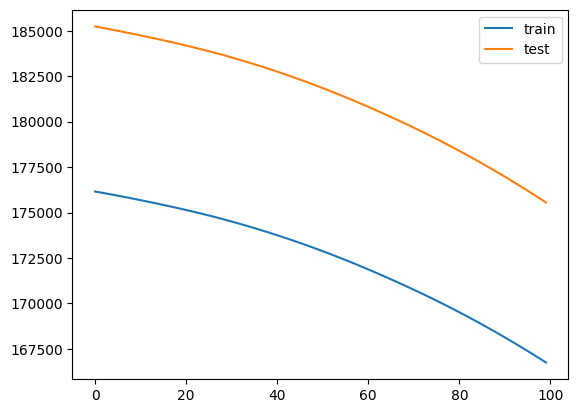

In [ ]:
import matplotlib.pyplot as plt
plt.plot(epochs,train_losses,label="train")
plt.plot(epochs,test_losses,label="test")
plt.legend()
plt.show()